In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'KPech-Orion-H-'

In [8]:
name_export='KPech-Orion-H'

In [9]:
flux_in = data_file + 'sum.fits'
radial_velocity_in = data_file + 'mean.fits'
#sigma_in = data_file + 'sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
#sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
dist = 410 #parsecs
pix = 0.534 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.0019877360925490972, 0.0007596443665792729)

In [13]:
sb = flux[0].data.astype(float)
vv = rad_vel[0].data.astype(float)
#ss = sigma["DATA"].data.astype("float")

In [14]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
#ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

In [15]:
trim = (slice(0, 513), slice(0, 355))

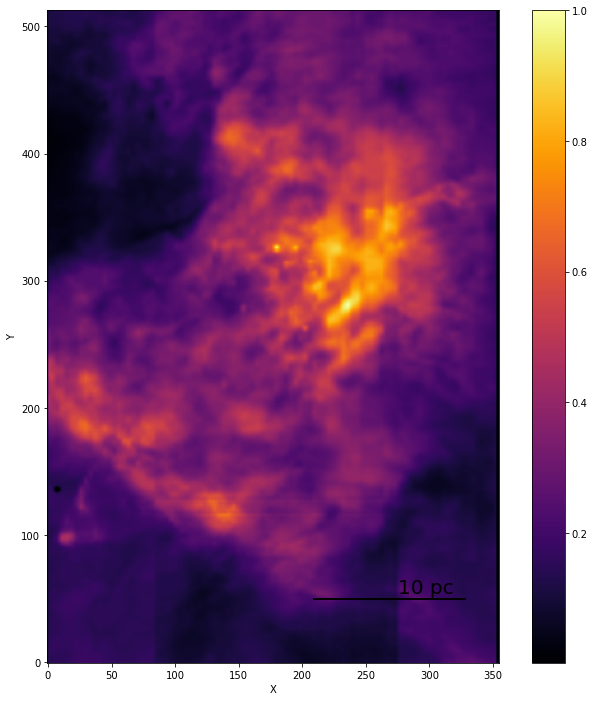

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb[trim]

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0.001,1)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [17]:
dffx=pd.DataFrame(sb[trim])

In [18]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

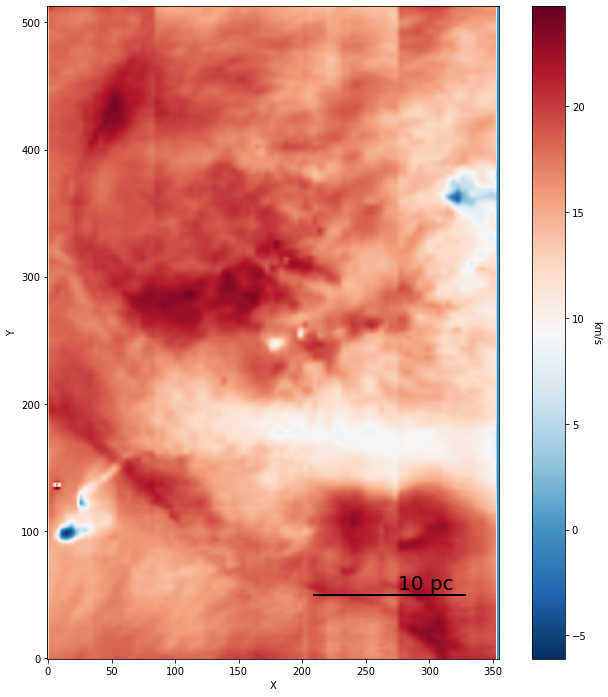

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv[trim]

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [20]:
RV=pd.DataFrame(vv[trim])

In [21]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss[trim]

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

dsig=pd.DataFrame(ss[trim])

dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [22]:
data=RV
data['I']=dffx.I
#data['Sig']=dsig.Sig
data.describe()

X              Y             RV              I
count  182115.000000  182115.000000  182115.000000  182115.000000
mean      256.000000     177.000000      16.635239       0.274289
std       148.090469     102.479548       3.415405       0.157736
min         0.000000       0.000000      -6.101346       0.000000
25%       128.000000      88.000000      14.938398       0.150644
50%       256.000000     177.000000      17.188578       0.251486
75%       384.000000     266.000000      18.844733       0.357876
max       512.000000     354.000000      24.722612       1.000000

In [23]:
mI=data.I>0.001

In [24]:
data[mI].describe()

X              Y             RV              I
count  180570.000000  180570.000000  180570.000000  180570.000000
mean      256.003987     176.505616      16.777023       0.276636
std       148.091317     101.610537       3.063674       0.156346
min         0.000000       1.000000      -6.101346       0.005861
25%       128.000000      89.000000      15.007586       0.152134
50%       256.000000     177.000000      17.219028       0.253248
75%       384.000000     265.000000      18.860407       0.359123
max       512.000000     352.000000      24.722612       1.000000

Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

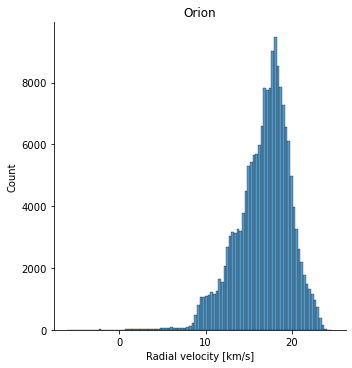

In [25]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

#plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [26]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[mI]),
      }
data_export_list

{'name': 'KPech-Orion-H',
 'pc': 0.0019877360925490972,
 's0': 0.0007596443665792729,
 'pix': 0.534,
 'KPech-Orion-H': array([[0.00000000e+00, 1.00000000e+00, 1.79514561e+01, 1.48896968e-01],
        [0.00000000e+00, 2.00000000e+00, 1.78544426e+01, 1.49001494e-01],
        [0.00000000e+00, 3.00000000e+00, 1.77574253e+01, 1.49106007e-01],
        ...,
        [5.12000000e+02, 3.50000000e+02, 1.56054735e+01, 1.75459158e-01],
        [5.12000000e+02, 3.51000000e+02, 1.55508642e+01, 1.72808647e-01],
        [5.12000000e+02, 3.52000000e+02, 1.54962549e+01, 1.70158148e-01]])}

In [27]:

data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' : flux[0].data.astype(float),
       'vv' : rad_vel[0].data.astype(float),
#       'ss' : sigma["DATA"].data.astype("float")

      }

data_export_matrix

{'name': 'KPech-Orion-H',
 'pc': 0.0019877360925490972,
 's0': 0.0007596443665792729,
 'pix': 0.534,
 'sb': array([[    0.        , 44715.76953125, 44747.16015625, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        , 44937.02734375, 44788.36328125, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        , 44972.7421875 , 44914.76953125, ...,
             0.        ,     0.        ,     0.        ],
        ...,
        [    0.        , 34299.37890625, 34724.73046875, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        , 33957.52734375, 34533.859375  , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        , 33835.45703125, 34487.28515625, ...,
             0.        ,     0.        ,     0.        ]]),
 'vv': array([[ 0.        , 17.95145607, 17.8544426 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 17.5464077 , 17.51469994, ..

In [28]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [29]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [30]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [31]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 13.657196044921875 seconds ---


In [32]:
!jupyter nbconvert --to script --no-prompt otv-KPech-Orion-H.ipynb

[NbConvertApp] Converting notebook otv-KPech-Orion-H.ipynb to script
[NbConvertApp] Writing 5289 bytes to otv-KPech-Orion-H.py
